In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv("churn-7043.csv")

In [2]:
df=df.drop(['customerID'], axis=1) 
num_df = df.select_dtypes(include=['float64', 'int64']).copy()
cat_df = df.select_dtypes(include=['object']).copy()

# Categorical boolean mask
categorical_feature_mask = cat_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = cat_df.columns[categorical_feature_mask].tolist()

import numpy as np
#conData=np.log(0.00001 + 1)
conData=0
cat_df=cat_df.fillna(conData)
num_df=num_df.fillna(conData)
cat_df=cat_df.astype(str)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df[categorical_cols] = cat_df[categorical_cols].apply(lambda col: le.fit_transform(col))

#cat_df[categorical_cols].head(10)


churn=cat_df['churn']
cat_df=cat_df.drop(['churn'], axis=1)


num_df=num_df.fillna(conData)

result_df = pd.concat([num_df, cat_df], axis=1)
np.nan_to_num(result_df)

result_df_op=result_df

X=result_df_op
y=churn

from sklearn.model_selection import train_test_split  
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train=X
X_test=X
y_train=y
y_test=y

In [3]:
X_train.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925


In [11]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
classifier = GaussianNB()

classifier.fit(X_train,y_train)

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

from sklearn.model_selection import cross_val_score
roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
print('roc_auc: ',roc_auc.mean())

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)

3950 1224 496 1373
pod:  0.7346174424826111
pof:  0.23656745264785467
AUC:  0.7490249949173782
roc_auc:  0.8257459903480955
auc:  0.7490249949173782


In [12]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)


#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

4523 651 1092 777
pod:  0.4157303370786517
pof:  0.1258214147661384
AUC:  0.6449544611562565


In [13]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier =RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

5068 106 1562 307
pod:  0.164258962011771
pof:  0.020487050637804406
AUC:  0.5718859556869833


auc:  0.5718859556869832


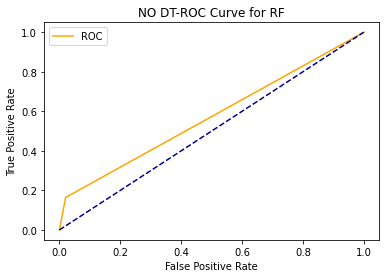

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = auc(fpr, tpr)
print('auc: ',auc)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NO DT-ROC Curve for RF')
plt.legend()
plt.show()

In [15]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
classifier = LogisticRegression()
classifier.fit(X_train, y_train) 

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)

C:\Users\IICT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\IICT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

4610 564 855 1014
pod:  0.5425361155698234
pof:  0.1090065713181291
AUC:  0.7167647721258471


C:\Users\IICT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
#Decision Tree
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', splitter='best')
#classifier.fit(x_train_chi, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)
end = time.time()
time_taken = end - start
print('Time: ',time_taken)


4131 1043 921 948
pod:  0.507223113964687
pof:  0.20158484731349052
AUC:  0.6528191333255983
accuracy:  0.7211415589947465
Time:  0.5950467586517334


In [6]:
#Gradient Boosting
import time
start = time.time()
from sklearn.ensemble import GradientBoostingClassifier

#classifier = GradientBoostingClassifier(max_features=None, max_depth=3, criterion='friedman_mse')
classifier = GradientBoostingClassifier()
#classifier.fit(X_train, y_train) 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred  = cross_val_predict(estimator = classifier, X = X_train, y = y_train, cv = 10)
tn, fp, fn, tp  = confusion_matrix(y_train, y_pred).ravel()
print(tn, fp, fn, tp)
pod=tp/(tp+fn)

print('pod: ',pod)
pof=fp/(fp+tn)
print ('pof: ',pof)
auc_val=(1+pod-pof)/2
print ('AUC: ',auc_val)

accuracy=(tp+tn)/(tp+fn+fp+tn)
print ('accuracy: ',accuracy)

#from sklearn.model_selection import cross_val_score
#roc_auc = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10,  scoring='roc_auc')
#print('roc_auc: ',roc_auc.mean())

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_train, y_pred)
#auc = auc(fpr, tpr)
#print('auc: ',auc)
end = time.time()
time_taken = end - start
print('Time: ',time_taken)

4694 480 898 971
pod:  0.5195291599785982
pof:  0.09277155005798222
AUC:  0.713378804960308
accuracy:  0.8043447394576175
Time:  9.094436407089233


In [13]:
import time
start = time.time()

#FNN
def get_FNN_Predict(X2_train, X2_test, y2_train, y2_test):
    from keras.models import Sequential
    from keras.layers import Dense
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X2_train.shape[1]
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using mse as a measure of model performance
    #model.compile(optimizer='adam', loss='mean_squared_error')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
    from keras.callbacks import EarlyStopping
    #set early stopping monitor so the model stops training when it won't improve anymore
    early_stopping_monitor = EarlyStopping(patience=3)
    #train model
    model.fit(X2_train, y2_train, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])
    y2_pred = model.predict(X2_test)
    print('y2_pred: ',y2_pred)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train):
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_FNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

print('tn_list: ',tn_list)
print ('fp_list: ',fp_list)
print ('fn_list: ',fn_list)
print ('tp_list: ',tp_list)


tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)
 

end = time.time()
time_taken = end - start
print('Time: ',time_taken)

Epoch 1/30
159/159 [==============================] - 23s 8ms/step - loss: 13.4467 - accuracy: 0.6108 - val_loss: 0.5873 - val_accuracy: 0.6869
Epoch 2/30
159/159 [==============================] - 0s 3ms/step - loss: 0.8543 - accuracy: 0.6671 - val_loss: 0.5026 - val_accuracy: 0.7342
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.8108 - accuracy: 0.6926 - val_loss: 1.0797 - val_accuracy: 0.7437
Epoch 4/30
159/159 [==============================] - 1s 4ms/step - loss: 0.6454 - accuracy: 0.7044 - val_loss: 0.4687 - val_accuracy: 0.7918
Epoch 5/30
159/159 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7658 - val_loss: 0.5371 - val_accuracy: 0.7508
Epoch 6/30
159/159 [==============================] - 1s 5ms/step - loss: 0.5269 - accuracy: 0.7476 - val_loss: 0.5699 - val_accuracy: 0.7129
Epoch 7/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5323 - accuracy: 0.7304 - val_loss: 0.5922 - val_accuracy: 0.7524
y2_p

159/159 [==============================] - 2s 7ms/step - loss: 10.0518 - accuracy: 0.6195 - val_loss: 0.7967 - val_accuracy: 0.7350
Epoch 2/30
159/159 [==============================] - 1s 3ms/step - loss: 1.2538 - accuracy: 0.6665 - val_loss: 0.5550 - val_accuracy: 0.7437
Epoch 3/30
159/159 [==============================] - 1s 5ms/step - loss: 0.7002 - accuracy: 0.6829 - val_loss: 1.0877 - val_accuracy: 0.7342
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.7036 - val_loss: 0.5191 - val_accuracy: 0.7539
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7289 - val_loss: 0.7573 - val_accuracy: 0.7492
Epoch 6/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.7503 - val_loss: 0.6155 - val_accuracy: 0.7484
Epoch 7/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5177 - accuracy: 0.7581 - val_loss: 0.5039 - val_accuracy: 0.7492
Epoch 8/30
159/1

159/159 [==============================] - 2s 5ms/step - loss: 13.1374 - accuracy: 0.6100 - val_loss: 1.7464 - val_accuracy: 0.7279
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 1.8061 - accuracy: 0.6389 - val_loss: 0.9811 - val_accuracy: 0.7287
Epoch 3/30
159/159 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.6983 - val_loss: 1.1971 - val_accuracy: 0.7303
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7034 - val_loss: 0.6819 - val_accuracy: 0.7350
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.6786 - val_loss: 0.5343 - val_accuracy: 0.7539
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.7344 - val_loss: 0.6719 - val_accuracy: 0.7342
Epoch 7/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5328 - accuracy: 0.7508 - val_loss: 0.6625 - val_accuracy: 0.5655
Epoch 8/30
159/1

159/159 [==============================] - 2s 5ms/step - loss: 19.4985 - accuracy: 0.6132 - val_loss: 0.9293 - val_accuracy: 0.3407
Epoch 2/30
159/159 [==============================] - 0s 3ms/step - loss: 0.8164 - accuracy: 0.6416 - val_loss: 0.4939 - val_accuracy: 0.7508
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.6208 - accuracy: 0.7207 - val_loss: 0.5848 - val_accuracy: 0.7287
Epoch 4/30
159/159 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7457 - val_loss: 0.4699 - val_accuracy: 0.7863
Epoch 5/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5036 - accuracy: 0.7569 - val_loss: 0.4708 - val_accuracy: 0.7760
Epoch 6/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5466 - accuracy: 0.7291 - val_loss: 0.6963 - val_accuracy: 0.7390
Epoch 7/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.7366 - val_loss: 0.5986 - val_accuracy: 0.7319
y2_pred:  [[4.32

159/159 [==============================] - 3s 8ms/step - loss: 12.4453 - accuracy: 0.6172 - val_loss: 1.0239 - val_accuracy: 0.7279
Epoch 2/30
159/159 [==============================] - 1s 4ms/step - loss: 1.0345 - accuracy: 0.6682 - val_loss: 0.7497 - val_accuracy: 0.5615
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.6896 - accuracy: 0.6924 - val_loss: 1.0458 - val_accuracy: 0.4006
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.7187 - accuracy: 0.6771 - val_loss: 0.5705 - val_accuracy: 0.7279
Epoch 5/30
159/159 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.7212 - val_loss: 0.5594 - val_accuracy: 0.7271
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.7110 - val_loss: 0.6155 - val_accuracy: 0.7279
Epoch 7/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.7226 - val_loss: 0.6608 - val_accuracy: 0.7256
Epoch 8/30
159/1

159/159 [==============================] - 3s 6ms/step - loss: 10.9926 - accuracy: 0.6242 - val_loss: 0.7029 - val_accuracy: 0.7366
Epoch 2/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6028 - accuracy: 0.7301 - val_loss: 0.9211 - val_accuracy: 0.4621
Epoch 3/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7250 - val_loss: 0.4727 - val_accuracy: 0.7989
Epoch 4/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.7494 - val_loss: 0.6076 - val_accuracy: 0.7445
Epoch 5/30
159/159 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7502 - val_loss: 0.4800 - val_accuracy: 0.7658
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7682 - val_loss: 0.4677 - val_accuracy: 0.7784
Epoch 7/30
159/159 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7634 - val_loss: 0.4618 - val_accuracy: 0.7768
Epoch 8/30
159/1

159/159 [==============================] - 2s 5ms/step - loss: 11.4919 - accuracy: 0.5984 - val_loss: 5.8989 - val_accuracy: 0.7279
Epoch 2/30
159/159 [==============================] - 1s 5ms/step - loss: 2.3525 - accuracy: 0.6576 - val_loss: 0.7012 - val_accuracy: 0.7413
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.6413 - accuracy: 0.7150 - val_loss: 0.4734 - val_accuracy: 0.7957
Epoch 4/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5110 - accuracy: 0.7583 - val_loss: 0.5342 - val_accuracy: 0.7263
Epoch 5/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.7574 - val_loss: 0.5051 - val_accuracy: 0.7547
Epoch 6/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.7554 - val_loss: 0.4530 - val_accuracy: 0.7981
Epoch 7/30
159/159 [==============================] - 1s 5ms/step - loss: 0.5104 - accuracy: 0.7689 - val_loss: 0.4694 - val_accuracy: 0.7658
Epoch 8/30
159/1

159/159 [==============================] - 2s 6ms/step - loss: 14.4755 - accuracy: 0.6014 - val_loss: 0.8323 - val_accuracy: 0.7279
Epoch 2/30
159/159 [==============================] - 0s 3ms/step - loss: 0.8099 - accuracy: 0.6752 - val_loss: 0.8079 - val_accuracy: 0.7279
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5963 - accuracy: 0.7258 - val_loss: 0.8807 - val_accuracy: 0.7295
Epoch 4/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5835 - accuracy: 0.7502 - val_loss: 0.5891 - val_accuracy: 0.7279
Epoch 5/30
159/159 [==============================] - 1s 4ms/step - loss: 0.4967 - accuracy: 0.7600 - val_loss: 0.5973 - val_accuracy: 0.7271
Epoch 6/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5018 - accuracy: 0.7576 - val_loss: 0.5259 - val_accuracy: 0.7374
Epoch 7/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5053 - accuracy: 0.7497 - val_loss: 0.4919 - val_accuracy: 0.7516
Epoch 8/30
159/1

159/159 [==============================] - 2s 6ms/step - loss: 18.1287 - accuracy: 0.6066 - val_loss: 0.5226 - val_accuracy: 0.7618
Epoch 2/30
159/159 [==============================] - 0s 3ms/step - loss: 0.8673 - accuracy: 0.6798 - val_loss: 0.5599 - val_accuracy: 0.7382
Epoch 3/30
159/159 [==============================] - 1s 4ms/step - loss: 0.6237 - accuracy: 0.7080 - val_loss: 0.5198 - val_accuracy: 0.7405
Epoch 4/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5629 - accuracy: 0.7303 - val_loss: 0.4839 - val_accuracy: 0.7910
Epoch 5/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5676 - accuracy: 0.7323 - val_loss: 1.5189 - val_accuracy: 0.7279
Epoch 6/30
159/159 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.7087 - val_loss: 0.5058 - val_accuracy: 0.7279
Epoch 7/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5433 - accuracy: 0.7334 - val_loss: 0.4860 - val_accuracy: 0.7311
y2_pred:  [[0.13

159/159 [==============================] - 2s 5ms/step - loss: 7.6764 - accuracy: 0.6004 - val_loss: 2.6198 - val_accuracy: 0.3241
Epoch 2/30
159/159 [==============================] - 1s 3ms/step - loss: 1.4138 - accuracy: 0.6425 - val_loss: 1.0308 - val_accuracy: 0.7263
Epoch 3/30
159/159 [==============================] - 1s 5ms/step - loss: 1.1492 - accuracy: 0.6526 - val_loss: 0.5030 - val_accuracy: 0.7429
Epoch 4/30
159/159 [==============================] - 1s 4ms/step - loss: 0.5446 - accuracy: 0.7351 - val_loss: 0.6641 - val_accuracy: 0.7319
Epoch 5/30
159/159 [==============================] - 0s 3ms/step - loss: 0.6084 - accuracy: 0.7174 - val_loss: 0.4941 - val_accuracy: 0.7366
Epoch 6/30
159/159 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7396 - val_loss: 0.5364 - val_accuracy: 0.7271
Epoch 7/30
159/159 [==============================] - 0s 3ms/step - loss: 0.5235 - accuracy: 0.7502 - val_loss: 0.4852 - val_accuracy: 0.7563
Epoch 8/30
159/15

In [14]:
#RNN
import time
start = time.time()

def get_RNN_Predict(X2_train, X2_test, y2_train, y2_test):
    import pandas as pd
    from keras.models import Sequential
    from keras.layers import Dense,Dropout, LSTM, GRU
    from keras.layers import Embedding
    max_features = 10000 # number of words to consider as features
    import numpy as np
    #create model 
    model = Sequential()
    model.add(Embedding(max_features, 32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X2_train, y2_train, epochs=30, batch_size=128, validation_split=0.2)
    y2_pred = model.predict(X2_test)
    y22_pred=y2_pred.round()
    print('y22_pred: ',y22_pred)
    return y22_pred

pod_list = []
pof_list = []
auc_val_list = []
tn_list= []
fp_list= []
fn_list= []
tp_list= []
    
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
for train_index, test_index in folds.split(X_train,y_train): 
    X2_train, X2_test, y2_train, y2_test=X_train.iloc[train_index], X_train.iloc[test_index],y_train.iloc[train_index], y_train.iloc[test_index]
    y_pred = get_RNN_Predict(X2_train, X2_test, y2_train, y2_test)
    tn, fp, fn, tp  = confusion_matrix(y2_test, y_pred).ravel()
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)
    tp_list.append(tp)
    
    pod=tp/(tp+fn)
    print('pod 1st: ',pod)
    pof=fp/(fp+tn)
    auc_val=(1+pod-pof)/2
    #break
    pod_list.append(pod)
    pof_list.append(pof)
    auc_val_list.append(auc_val)

print('pod: ',pod_list)
print ('pof: ',pof_list)
print ('auc: ',auc_val_list)

tn=sum(tn_list)
fp=sum(fp_list) 
fn=sum(fn_list) 
tp=sum(tp_list)
print(tn, fp, fn, tp)

end = time.time()
time_taken = end - start
print('Time: ',time_taken)

Epoch 1/5
40/40 [==============================] - 11s 57ms/step - loss: 0.6069 - acc: 0.7012 - val_loss: 0.5424 - val_acc: 0.7279
Epoch 2/5
40/40 [==============================] - 4s 90ms/step - loss: 0.5221 - acc: 0.7384 - val_loss: 0.5246 - val_acc: 0.7279
Epoch 3/5
40/40 [==============================] - 1s 19ms/step - loss: 0.4909 - acc: 0.7405 - val_loss: 0.5078 - val_acc: 0.7366
Epoch 4/5
40/40 [==============================] - 8s 195ms/step - loss: 0.4758 - acc: 0.7552 - val_loss: 0.4939 - val_acc: 0.7587
Epoch 5/5
40/40 [==============================] - 5s 129ms/step - loss: 0.4517 - acc: 0.7862 - val_loss: 0.4887 - val_acc: 0.7634
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]


Epoch 1/5
40/40 [==============================] - 13s 235ms/step - loss: 0.6165 - acc: 0.7039 - val_loss: 0.5504 - val_acc: 0.7279
Epoch 2/5
40/40 [==============================] - 4s 105ms/step - loss: 0.5298 - acc: 0.7395 - val_loss: 0.5267 - val_acc: 0.7240
Epoch 3/5
40/40 [==============================] - 1s 24ms/step - loss: 0.5026 - acc: 0.7288 - val_loss: 0.5158 - val_acc: 0.7295
Epoch 4/5
40/40 [==============================] - 7s 163ms/step - loss: 0.4777 - acc: 0.7481 - val_loss: 0.4972 - val_acc: 0.7397
Epoch 5/5
40/40 [==============================] - 2s 58ms/step - loss: 0.4578 - acc: 0.7650 - val_loss: 0.4850 - val_acc: 0.7508
y22_pred:  [[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]

Epoch 1/5
40/40 [==============================] - 5s 57ms/step - loss: 0.6121 - acc: 0.6927 - val_loss: 0.5533 - val_acc: 0.7279
Epoch 2/5
40/40 [==============================] - 2s 49ms/step - loss: 0.5232 - acc: 0.7418 - val_loss: 0.5550 - val_acc: 0.7224
Epoch 3/5
40/40 [==============================] - 1s 23ms/step - loss: 0.4934 - acc: 0.7471 - val_loss: 0.5050 - val_acc: 0.7319
Epoch 4/5
40/40 [==============================] - 2s 35ms/step - loss: 0.4696 - acc: 0.7590 - val_loss: 0.5081 - val_acc: 0.7508
Epoch 5/5
40/40 [==============================] - 3s 69ms/step - loss: 0.4467 - acc: 0.7854 - val_loss: 0.5089 - val_acc: 0.7484
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

Epoch 1/5
40/40 [==============================] - 7s 69ms/step - loss: 0.6115 - acc: 0.7121 - val_loss: 0.5442 - val_acc: 0.7279
Epoch 2/5
40/40 [==============================] - 7s 165ms/step - loss: 0.5321 - acc: 0.7240 - val_loss: 0.5274 - val_acc: 0.7295
Epoch 3/5
40/40 [==============================] - 6s 153ms/step - loss: 0.4997 - acc: 0.7409 - val_loss: 0.5176 - val_acc: 0.7311
Epoch 4/5
40/40 [==============================] - 2s 45ms/step - loss: 0.4763 - acc: 0.7513 - val_loss: 0.5037 - val_acc: 0.7311
Epoch 5/5
40/40 [==============================] - 3s 83ms/step - loss: 0.4594 - acc: 0.7679 - val_loss: 0.5457 - val_acc: 0.7358
y22_pred:  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 

Epoch 1/5
40/40 [==============================] - 8s 109ms/step - loss: 0.6104 - acc: 0.7198 - val_loss: 0.5385 - val_acc: 0.7248
Epoch 2/5
40/40 [==============================] - 2s 36ms/step - loss: 0.5165 - acc: 0.7395 - val_loss: 0.5255 - val_acc: 0.7192
Epoch 3/5
40/40 [==============================] - 2s 38ms/step - loss: 0.4962 - acc: 0.7436 - val_loss: 0.5078 - val_acc: 0.7248
Epoch 4/5
40/40 [==============================] - 2s 41ms/step - loss: 0.4672 - acc: 0.7544 - val_loss: 0.5150 - val_acc: 0.7374
Epoch 5/5
40/40 [==============================] - 5s 124ms/step - loss: 0.4465 - acc: 0.7828 - val_loss: 0.4942 - val_acc: 0.7374
y22_pred:  [[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 